<a href="https://colab.research.google.com/github/brenothiago/DataScience/blob/master/Visualiza%C3%A7%C3%A3o_de_dados_complexos_com_Python_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"> 
<img src="https://datascience.study/wp-content/uploads/2019/01/python-logo.png">
</p>

# Visualização de dados complexos com Python

Visualização de dados é uma área de estudo que tenta compreender dados de forma gráfica. Na vida do cientista de dados certamente o que não vai faltar são dados. Quando falamos de espaços em 2D ou 3D é fácil visualizar os dados. Mas em espaços 4D, ou maiores ainda, como fazemos para "visualizar" esses dados? Esses são os chamados **dados complexos** e vamos estudar formas de visualizar esses dados utilizando Python. Antes de mais nada, devemos compreender que técnicas de Aprendizagem de Máquinas (aplicadas em ciência de dados) lidam em sua grande maioria com dados **numéricos**. Portanto, como fazer as técnicas entenderem dados categóricos? E quando temos dados nulos? Essas são outras perguntas que serão respondidas nesse curso.


## Pandas api

O [pandas](https://pandas.pydata.org/pandas-docs/stable/) é uma biblioteca Python muito utilizada para leitura e manipulação de dados provenientes de arquivos de texto (csv, xls, txt). Além disso, ela possui diversos métodos para filtrar dados, selecionar dados, juntar dados e muitos outros. Nós importamos o pandas para o Python a partir do comando abaixo:

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

Vamos carregar um conjunto simples de dados utilizando **files.upload()** que vai abrir uma janela convencional e solicitar os arquivos.

In [0]:
# Api para fazer upload de dados no Google Colab
from google.colab import files

# Carregando arquivo via upload para o colab
upload = files.upload()

Saving data1.csv to data1 (1).csv


Agora podemos carregar nossos dados utilizando o método **pd.read_csv**, que recebe como primeiro parâmetro o nome do arquivo com extensão, e os parâmetros opcionais **sep** que especifica um separador e **header** que indica se existe ou não header no arquivo (por default ele considera que existe, para ignorar deve-se passar **header=None**).

In [0]:
# Lendo um arquivo com pandas
dados1 = pd.read_csv('data1.csv', sep=',')
dados1

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
1,Roberto,5,7,7.5
2,Ana,2,5,9.0
3,Joaquim,1,10,7.5
4,Elizabeth,4,6,8.0


Quando chamamos dados1 acima ele apresenta uma tabela bem amigável com os dados carregados. Internamente os dados estão armazenados como arrays numpy. Muitas vezes temos uma quantidade absurda de dados e não é possível imprimir todos eles no terminal. Dessa forma, existe um método chamado **head()** que recebe como parâmetro o número de linhas que deve ser impresso:

In [0]:
# Imprime as três primeiras linhas de dados1
dados1.head(3)

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
1,Roberto,5,7,7.5
2,Ana,2,5,9.0


Algumas vezes é interessante extrair informações estatísticas dos nossos dados, no pandas existe o método **describe()** que apresenta uma estatística resumida dos dados:

In [0]:
# Apresentando algumas estatísticas dos nossos dados
dados1.describe()

,Faltas,Prova,Seminário
count,5.000000,5.000000,5.00000
mean,3.000000,6.000000,8.10000
std,1.581139,2.915476,0.65192
min,1.000000,2.000000,7.50000
25%,2.000000,5.000000,7.50000
50%,3.000000,6.000000,8.00000
75%,4.000000,7.000000,8.50000
max,5.000000,10.000000,9.00000


Quando informamos um **header** para os nosso dados é possível utilizar a chave como índice das colunas (similar ao funcionamento de um dicionário em Python)

In [0]:
# Pegando os dados da coluna faltas
dados1['Faltas']

0    3
1    5
2    2
3    1
4    4
Name: Faltas, dtype: int64

Para obter a lista de colunas atuais do nosso objeto pandas existe o atributo **columns**, mais uma vez é similar aos dicionários em Python (provavelmente é implementado assim).

In [0]:
# Lista de colunas
print('As colunas do meu objeto pandas são', dados1.columns)

As colunas do meu objeto pandas são Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')


Estamos usando o nome objeto pandas, isso porque internamente o que temos é uma classe chamada DataFrame que contém os métodos que estamos utilizando, porém não vamos ver orientação a objetos nessa aula, portanto vamos manter o nome objeto pandas. O pandas permite ordenar os dados utilizando alguma coluna como referência, podemos fazer isso a partir do método **sort_values** passando na opção **by** o nome da coluna.

In [0]:
# Ordenando nossos dados pela coluna Aluno
dados1.sort_values(by='Aluno')

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
2,Ana,2,5,9.0
4,Elizabeth,4,6,8.0
3,Joaquim,1,10,7.5
1,Roberto,5,7,7.5


No nosso exemplo acima, os dados foram ordenados a partir da coluna Aluno. Esse comportamento é similar ao **order_by** muito utilizado em bancos de dados **Sql**. Outro comando útil é o **unique()** que serve para retornar os valores exclusivos de uma dada coluna do objeto pandas.

In [0]:
# Por exemplo na seminários temos valores entre 7.5 e 9.0 
# os valores únicos seriam aqueles sem repetição, isto é,
# 7.5, 8, 8.5, 9
dados1['Seminário'].unique()

array([8.5, 7.5, 9. , 8. ])

Podemos também utilizar o comando **len** que vai retornar a quantidade de itens (ou linhas, ou registros) do nosso objeto pandas.

In [0]:
# Pegando o número de linhas (ou comprimento)
# do nosso objeto pandas
print('Nós temos %d registros' % len(dados1))

Nós temos 5 registros


Para saber especificamente quantas colunas e linhas tem o nosso DataFrame, podemos acessar **df.shape**:

In [0]:
# Acessando o número de linhas e colunas de um DataFrame
tamanho = dados1.shape
print('Nosso DataFrame tem %d linhas e %d colunas' % (tamanho[0], tamanho[1]))

Nosso DataFrame tem 5 linhas e 4 colunas


### Comando iloc

E se quissermos selecionar linhas ao invés de colunas? Podemos fazer uso do método iloc. Com o método iloc podemos selecionar por linhas, colunas ou por slicing. Uma coisa importante é que o iloc suporta apenas números como índices (similar  a uma lista em Python).

In [0]:
# Primeiro aluno da tabela
print('O primeiro aluno é\n')
print(dados1.iloc[0, :])

# Último aluno da tabela
print('\nO último aluno é\n')
print(dados1.iloc[-1, :])

# Dois primeiros alunos
print('Os dois primeiros alunos são\n')
dados1.iloc[0:2, :]

O primeiro aluno é

Aluno        Alberto
Faltas             3
Prova              2
Seminário        8.5
Name: 0, dtype: object

O último aluno é

Aluno        Elizabeth
Faltas               4
Prova                6
Seminário            8
Name: 4, dtype: object
Os dois primeiros alunos são



,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
1,Roberto,5,7,7.5


O comando **iloc** é bem simples mas versátil quando precisamos filtrar os dados por índices numéricos. Contudo, geralmente queremos utilizar condições ou mesmo chaves que representam strings (similar aos dicionários), nesse caso temos o comando **loc**.

### Comando loc

O irmão mais velho do iloc é o loc. No loc é possível usar strings para obter linhas, como fazemos com os headers das colunas. Além do mais podemos usar condições. Vale ressaltar que, ele também suporta as operações do iloc. Vejamos um exemplo do loc utilizando uma chave do tipo string.

In [0]:
# Pegando o usuário com nome Alberto
dados1.loc[dados1['Aluno'] == 'Alberto', :]

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5


Opcionalmente, podemos trocar o índice de busca (a coluna que é usada como índice) que por padrão é um indentificador único que o pandas cria para cada uma das amostras. Por exemplo, podemos trocar para o índice Aluno e dessa forma basta usar o nome do aluno para filtrar o DataFrame:

In [0]:
# Configurando o índice de busca como a coluna Aluno
dados1_new_index = dados1.set_index('Aluno')

# Agora podemos executar o mesmo código da célula anterior de maneira mais simples
dados1_new_index.loc['Alberto', :]

Faltas       3.0
Prova        2.0
Seminário    8.5
Name: Alberto, dtype: float64

Note que, no nosso exemplo acima, tivemos que atribuir a chamada de set_index para um novo DataFrame, isso ocorre porque essa operação não altera o dados1 e sim retorna um novo DataFrame com o resultado do filtro. Isso ocorre porque muitos filtros são interessantes para obter dados sem alterar o objeto original. O comando loc também suporta múltiplos índices de uma vez:

In [0]:
# Nomes de Alunos que quero buscar
alunos = ['Alberto', 'Ana']

# Exibindo todos dos dados dos alunos Alberto e Ana
dados1_new_index.loc[alunos, :]

,Faltas,Prova,Seminário
Aluno,,,
Alberto,3,2,8.5
Ana,2,5,9.0


Além do mais é possível também filtrar as colunas:

In [0]:
# Exibindo os dados Faltas e Prova dos alunos Alberto e Ana
colunas = ['Faltas', 'Prova']
dados1_new_index.loc[alunos, colunas]

,Faltas,Prova
Aluno,,
Alberto,3,2
Ana,2,5


E agora vem um dos recursos mais fantásticos do loc! Podemos utilizar operadores condicionais e lógicos para filtrar os dados. Por exemplo, suponha que queremos apenas os alunos com falta maior que dois.

In [0]:
# Pegando os alunos com falta > 2
dados1.loc[dados1['Faltas'] > 2, :]

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
1,Roberto,5,7,7.5
4,Elizabeth,4,6,8.0


Operações de seleção mais complexas são possíveis. Por exemplo, retornar todos os alunos que tiveram Prova > 5 e Seminários > 7.5

In [0]:
# Pegando os alunos com Prova > 5 e Seminário > 7.5 
dados1.loc[(dados1['Prova'] > 5) & (dados1['Seminário'] > 7.5)]

,Aluno,Faltas,Prova,Seminário
4,Elizabeth,4,6,8.0


O operador loc também suporta atribuição por slicing e pelas condicionais. Tome cuidado com essa operação, pois, ela vai alterar o conteúdo do objeto. Por exemplo, digamos que queremos adicionar um ponto aos alunos que tem falta menor que 3. 

In [0]:
# Cuidado a linha abaixo altera o conteúdo de dados_alterado!
dados_alterado = dados1.copy()
dados_alterado.loc[dados_alterado['Faltas'] < 3, ['Prova']] += 1
dados_alterado

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
1,Roberto,5,7,7.5
2,Ana,2,6,9.0
3,Joaquim,1,11,7.5
4,Elizabeth,4,6,8.0


### Comando drop

O comando **drop()** é útil quando queremos remover colunas (características) ou linhas (amostras) do nosso DataFrame baseado em alguma condição. Por padrão ele recebe os índices das linhas que devem ser removidas:

In [0]:
# Removendo as duas primeiras linhas 
linhas_para_remover = [0, 1]
dados1.drop(linhas_para_remover)

,Aluno,Faltas,Prova,Seminário
2,Ana,2,5,9.0
3,Joaquim,1,10,7.5
4,Elizabeth,4,6,8.0


A remoção é baseada no índice do Dataframe. Portanto, se você alterar o índice via **set_index()** é esse o índice que será utilizado para remoção. Por exemplo, usando o índice 'Aluno' que configuramos acima:

In [0]:
# Vamos remover as linhas do aluno Alberto
dados1_new_index.drop('Alberto')

,Faltas,Prova,Seminário
Aluno,,,
Roberto,5,7,7.5
Ana,2,5,9.0
Joaquim,1,10,7.5
Elizabeth,4,6,8.0


Podemos utilizar operadores condicionais e lógicos para remover os dados, assim como fazemos no loc e iloc

In [0]:
# Selecionar linhas para remoção
linhas_para_remover = dados1_new_index[dados1_new_index['Faltas'] > 3].index

# Dropar as linhas
dados1_new_index.drop(linhas_para_remover)

,Faltas,Prova,Seminário
Aluno,,,
Alberto,3,2,8.5
Ana,2,5,9.0
Joaquim,1,10,7.5


No exemplo acima acessamos o valor de **index** do DataFrame, isso é necessário, pois, no caso de remover linhas o comando drop depende dos índices. A outra opção do **drop()** é remover por colunas em vez de linhas, nesse caso é necessário passar o parâmetro **axis=1**, que significa que ele vai remover no eixo 1, ou seja, o eixo das colunas.

In [0]:
# Colunas para serem removidas
colunas = ['Faltas', 'Prova']

# Removendo via drop
dados1.drop(colunas, axis=1)

,Aluno,Seminário
0,Alberto,8.5
1,Roberto,7.5
2,Ana,9.0
3,Joaquim,7.5
4,Elizabeth,8.0


### Comando query

O comando **query()** é mais um dos poderosos comandos disponíveis no pandas. O comando recebe uma String com um padrão de busca e retorna um DataFrame filtrado.

In [0]:
# Retornando amostras com Seminário > 8
dados1.query('Seminário > 8')

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
2,Ana,2,5,9.0


O comando query é similar as queries de SQL. Diferente do loc, no método query os comandos lógicos são um pouco diferentes, em vez de usar '&' nós usamos **and** e em vez de usar '|' nos usamos **or** e o operador de diferença '~' se torna **!=**, podemos também utilizar o operador **in**.

In [0]:
# Construindo uma query, note que as strings estão entre aspas duplas
query = 'Aluno in ["Alberto", "Ana"] and Faltas < 5'
dados1.query(query)

,Aluno,Faltas,Prova,Seminário
0,Alberto,3,2,8.5
2,Ana,2,5,9.0


O comando **query** não suporta espaços nos nomes de colunas, por isso, quando uma coluna tiver espaços, é necessário usar o operador de aspa invertida.

In [0]:
# Copiando dados originais para não sobrescrever
novos_dados = dados1.copy()

# Nome da coluna
identificador = "Notas Trabalhos"

# Inserir no final
posicao = len(novos_dados)-1

# Inserindo
novos_dados.insert(posicao, identificador, [10, 8, 6, 3, 6])

# Fazendo uma query com uma coluna contendo espaços
novos_dados.query('`Notas Trabalhos` == 8')

,Aluno,Faltas,Prova,Seminário,Notas Trabalhos
1,Roberto,5,7,7.5,8


As consultas podem ser tão complexas quanto necessárias, a documentação do pandas tem mais detalhes sobre esse comando [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html).

### Comandos estatísticos

O pandas também suporta alguns comandos estatísticos, úteis para várias tarefas de Aprendizagem de Máquinas. O primeiro deles fornece informações sobre nosso conjunto é o método **describe()**. Esse método retorna algumas informações estatísticas de acordo com as colunas do DataFrame.

In [0]:
# Algumas informações estatísticas do conjunto
dados1.describe()

,Faltas,Prova,Seminário
count,5.000000,5.000000,5.00000
mean,3.000000,6.000000,8.10000
std,1.581139,2.915476,0.65192
min,1.000000,2.000000,7.50000
25%,2.000000,5.000000,7.50000
50%,3.000000,6.000000,8.00000
75%,4.000000,7.000000,8.50000
max,5.000000,10.000000,9.00000


Se queremos efetivamente os valores, podemos utilizar os métodos: 

*   **mean()** : retorna a média de cada coluna
*   **median()** : retorna a mediana de cada coluna
*   **std()** : desvio padrão
*   **min()** : mínimo
*   **max()** : máximo
*   **etc**

<u>Observação:</u> Os comandos acima funcionam apenas com números.

In [0]:
# Por exemplo, a média de todas as colunas
dados1.mean()

Faltas       3.0
Prova        6.0
Seminário    8.1
dtype: float64

É possível aplicar o comando a partir de um filtro, por exemplo em uma coluna específica:

In [0]:
# Média da sala nas provas
dados1['Prova'].mean()

6.0

Alguns outros comandos úteis estão disponíveis, como o **sum()** que soma as colunas, se o dado for uma String o resultado é uma concatenação:

In [0]:
dados1.sum()

Aluno        AlbertoRobertoAnaJoaquimElizabeth
Faltas                                      15
Prova                                       30
Seminário                                 40.5
dtype: object

## Matplotlib api

A [matplotlib](https://matplotlib.org/) é provavelmente a mais famosa biblioteca para plotar gráficos em Python. Existem alternativas como a [seaborn](https://seaborn.pydata.org/), mas como a seaborn é baseada na matplotlib é melhor aprender a própria matplotlib. 

In [0]:
import matplotlib.pyplot as plt

### Gráficos de linha
O comando mais simples da matplotlib é o **plot** que serve par criar gráficos de linha. O comando plot recebe uma grande quantidade de argumentos, mas pelo menos dois são obrigatórios: um valor (ou lista, ou coluna do pandas) para o eixo x e outro valor (ou lista, ou coluna do pandas) para o y.

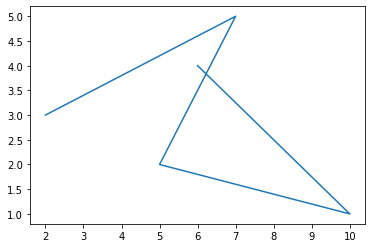

In [0]:
# Plotando um gráfico com matplotlib e pandas
plt.plot(dados1['Prova'], dados1['Faltas'])
plt.show()

Nosso gráfico acima está bem incompleto, vamos adicionar algumas informações interessantes. Para adicionar um título, utilizamos o método **plt.title** para adicionar rótulos nos eixos fazemos uso dos métodos **plt.xlabel** e **plt.ylabel**.

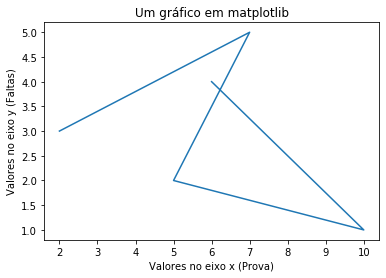

In [0]:
# Plotando meu primeiro gráfico com matplotlib
plt.plot(dados1['Prova'], dados1['Faltas'])
plt.title('Um gráfico em matplotlib')
plt.xlabel('Valores no eixo x (Prova)')
plt.ylabel('Valores no eixo y (Faltas)')
plt.show()

Podemos passar um terceiro parâmetro para estilizar a cor e o tipo de linha do plot, ele é uma string, as variações são enormes, elas estão disponíveis na [documentação](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html) oficial. Por exemplo, podemos mudar a cor para vermelho e a linha para tracejada passando a terceira opção do plot como 'r--'.

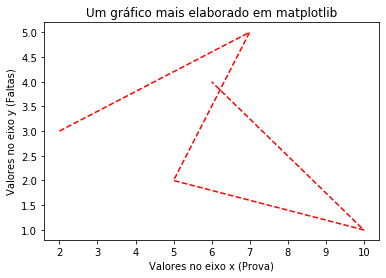

In [0]:
# Plotando um gráfico mais elaborado
plt.plot(dados1['Prova'], dados1['Faltas'], 'r--')
plt.title('Um gráfico mais elaborado em matplotlib')
plt.xlabel('Valores no eixo x (Prova)')
plt.ylabel('Valores no eixo y (Faltas)')
plt.show()

Também é possível fazer múltiplos plots em um mesmo comando passando sequências x, y e estilização.

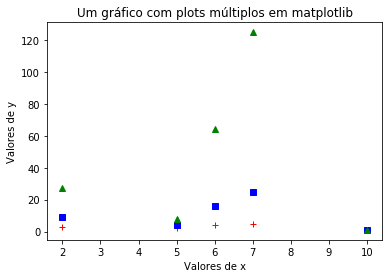

In [0]:
# Múltiplos plots no mesmo comando
prova = dados1['Prova']
faltas = dados1['Faltas']
plt.plot(prova, faltas, 'r+', prova, faltas**2, 'bs', prova, faltas**3, 'g^')
plt.title('Um gráfico com plots múltiplos em matplotlib')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.show()

### Gráficos de barra

Podemos plotar também variáveis categóricas. Por exemplo, com o comando **plt.bar** plotamos um gráfico de barra (um histograma) considerando que a categoria vem no eixo x e a contagem da categoria no eixo y.

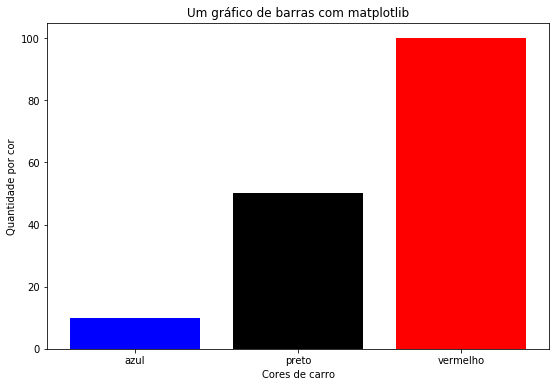

In [0]:
# Cores de carro e quantidade de carros por cor
cores_de_carros = ['azul', 'preto', 'vermelho']
carros_por_cor = [10, 50, 100]

# Plotando
plt.figure(figsize=(9, 6))
plt.bar(cores_de_carros, carros_por_cor, color=['blue', 'black', 'red'])
plt.title('Um gráfico de barras com matplotlib')
plt.xlabel('Cores de carro')
plt.ylabel('Quantidade por cor')
plt.show()

No gráfico acima utilizamos um comando **plt.figure** e passamos a opção **figsize** que recebe uma tupla com os valores de tamanho em largura e altura do gráfico. Além disso, utilizamos a opção **color** que permite passar uma lista de cores para as nossas barras. Podemos estilizar os gráficos utilizando estilos prontos da matplotlib através do método **plt.style.use**, alguns vêm da biblioteca searborn.

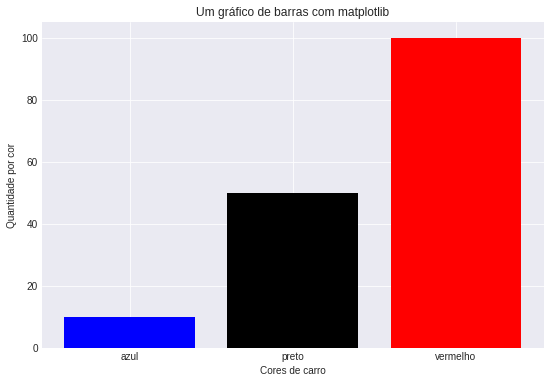

In [0]:
# Usando um estilo da searborn
plt.style.use('seaborn-darkgrid')

# Cores de carro e quantidade de carros por cor
cores_de_carros = ['azul', 'preto', 'vermelho']
carros_por_cor = [10, 50, 100]

# Plotando
plt.figure(figsize=(9, 6)) 
plt.bar(cores_de_carros, carros_por_cor, color=['blue', 'black', 'red'])
plt.title('Um gráfico de barras com matplotlib')
plt.xlabel('Cores de carro')
plt.ylabel('Quantidade por cor')
plt.show()

É possível consultar a lista de estilos disponíveis através do atributo **plt.style.available**.

In [0]:
# Estilos disponíveis
print('Lista de estilos disponíveis:\n', plt.style.available)

# Setando o estilo ggplot
plt.style.use('ggplot')

Lista de estilos disponíveis:
 ['grayscale', 'seaborn-talk', 'seaborn-deep', 'seaborn-poster', 'seaborn-white', 'seaborn-pastel', 'seaborn-whitegrid', 'seaborn-ticks', 'seaborn-darkgrid', 'classic', 'ggplot', 'seaborn-paper', 'seaborn', 'seaborn-notebook', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', '_classic_test', 'tableau-colorblind10', 'Solarize_Light2', 'seaborn-bright', 'seaborn-colorblind', 'dark_background', 'bmh', 'fast', 'seaborn-muted']


### Histogramas

A matplotlib fornece um método **hist()** especifico para trabalhar com histogramas e mais interessante é que podemos fazer histogramas de variáveis reais. Para isso, passamos um parâmetro **bins** que especifica o número de faixas que serão utilizadas para discretizar a variável real. O número de bins varia com o tipo de variável, se for muito pequeno muitos dados vão ficar juntos (na mesma faixa) se for muito grande pode ser demorado para o histograma ser gerado (depende do número de dados de entrada).

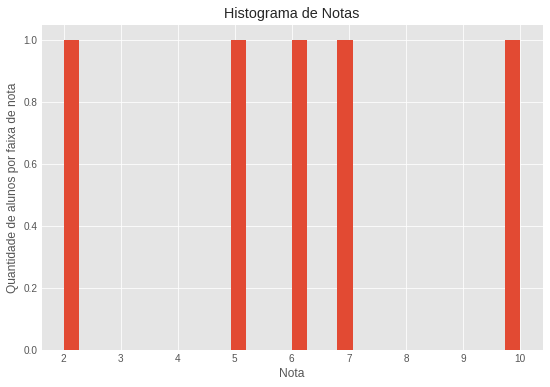

In [0]:
# Exemplo de histograma de uma variável real
plt.figure(figsize=(9, 6)) 
plt.hist(dados1['Prova'], bins=30)
plt.title('Histograma de Notas')
plt.xlabel('Nota')
plt.ylabel('Quantidade de alunos por faixa de nota')
plt.show()

### Subplots

Um dos recursos muito interessantes da matplotlib é a capacidade de fazer plots independentes um ao lado do outro, ou abaixo. Fazemos isso utilizando o método **subplot()**. Primeiro é necessário criar uma figura que vai receber os subplots usando o método **figure()**.  O método subplot recebe como parâmetro o número de linhas e colunas do grid (ele trata a figure como um grid) e um terceiro parâmetro que informa a posição do subplot no grid. É importante que, o método **plt.show()** seja chamado apenas ao final dos subplots.

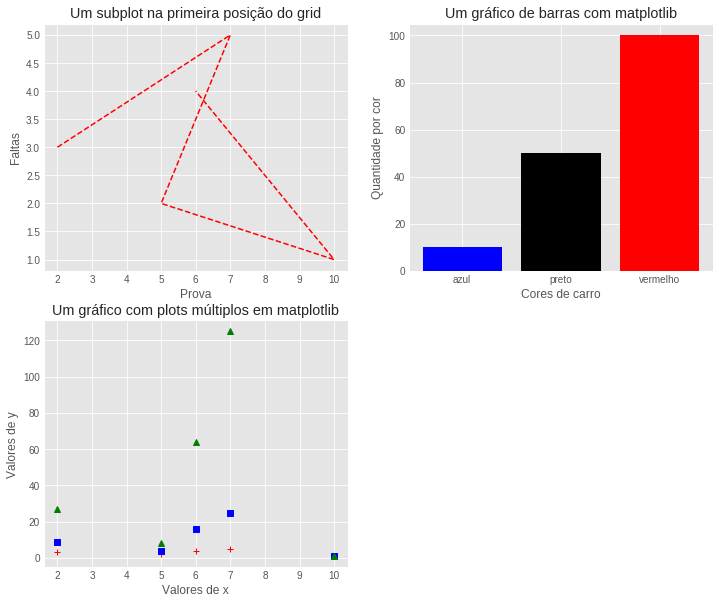

In [0]:
# Criando uma figura para receber os subplots
plt.figure(figsize=(12, 10))

# Criando um subplot
ax = plt.subplot(2, 2, 1)

# Colocando os dados do subplot
ax.plot(dados1['Prova'], dados1['Faltas'], 'r--')
ax.set_title('Um subplot na primeira posição do grid')
ax.set_xlabel('Prova')
ax.set_ylabel('Faltas')

# Criando o segundo subplot
ax = plt.subplot(2, 2, 2)
ax.bar(cores_de_carros, carros_por_cor, color=['blue', 'black', 'red'])
ax.set_title('Um gráfico de barras com matplotlib')
ax.set_xlabel('Cores de carro')
ax.set_ylabel('Quantidade por cor')

# Outro subplot
prova = dados1['Prova']
faltas = dados1['Faltas']
ax = plt.subplot(2, 2, 3)
ax.plot(prova, faltas, 'r+', prova, faltas**2, 'bs', prova, faltas**3, 'g^')
ax.set_title('Um gráfico com plots múltiplos em matplotlib')
ax.set_xlabel('Valores de x')
ax.set_ylabel('Valores de y')

# Apenas no final
plt.show()

É possível combinar multiplos subplots, um após o outro, basta chamar o plt.show() ao final dos subplots, criar uma nova figura, colocar novos subplots e então chamar plt.show() novamente.

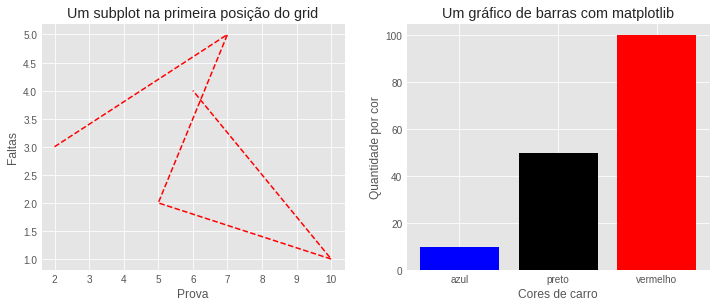

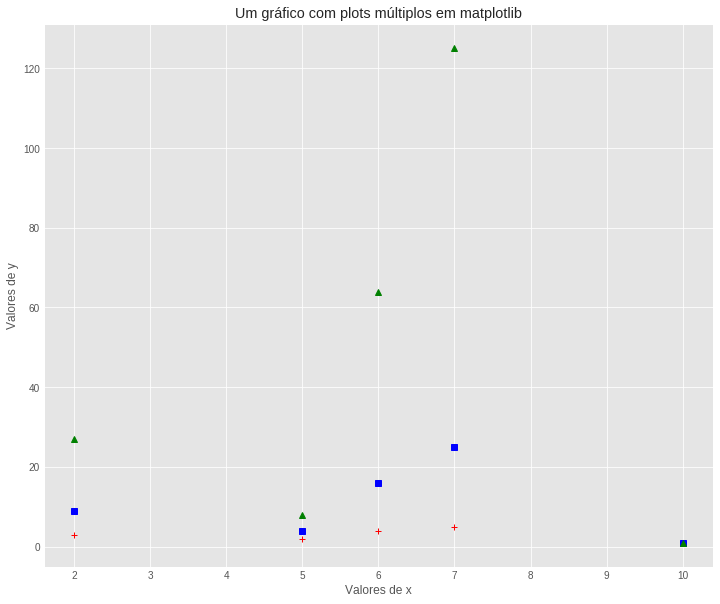

In [0]:
# Criando uma figura para receber os subplots
plt.figure(figsize=(12, 10))

# Criando um subplot
ax = plt.subplot(2, 2, 1)

# Colocando os dados do subplot
ax.plot(dados1['Prova'], dados1['Faltas'], 'r--')
ax.set_title('Um subplot na primeira posição do grid')
ax.set_xlabel('Prova')
ax.set_ylabel('Faltas')

# Criando o segundo subplot
ax = plt.subplot(2, 2, 2)
ax.bar(cores_de_carros, carros_por_cor, color=['blue', 'black', 'red'])
ax.set_title('Um gráfico de barras com matplotlib')
ax.set_xlabel('Cores de carro')
ax.set_ylabel('Quantidade por cor')

# Chamada de pls.show() para mostrar os primeiros subplots
plt.show()

# Um subplot independente
prova = dados1['Prova']
faltas = dados1['Faltas']

# Nova figura para o subplot
plt.figure(figsize=(12, 10))

# Não vamos informar as posições para ele ocupar toda a figura
ax = plt.subplot()
ax.plot(prova, faltas, 'r+', prova, faltas**2, 'bs', prova, faltas**3, 'g^')
ax.set_title('Um gráfico com plots múltiplos em matplotlib')
ax.set_xlabel('Valores de x')
ax.set_ylabel('Valores de y')

# Apenas no final
plt.show()

Os subplots podem ser tão complexos quanto necessários, a documentação oficial tem diversos exemplos de uso do método subplot disponível [aqui](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot).

## Data Wrangling

Data wrangling ou em português preparação de dados é uma área dedicada a coletar, limpar, normalizar, combinar, estruturar e organizar os dados que serão analisados ou utilizados como entrada de uma técnica de Aprendizagem de Máquinas. Essa é uma etapa de pré-processamento necessária em Aprendizagem de Máquinas.

### Lidando com dados incompletos

Em um mundo ideal, os dados adquiridos estão perfeitamente representados. Eles são coletados da forma correta e não faltam dados. Infelizmente no mundo real não é assim. Muitos bancos de dados estão incompletos (muito comum em sistemas de cadastro de usuários), e muitas **características** são categóricas, isto é, são representadas por Strings (sexo, cor de um produto, estado civil, entre muitas outras).

### Identificando dados incompletos

Antes de discutir formas de lidar com dados incompletos, vamos primeiro definir um conjunto para trabalharmos. O conjunto que vamos utilizar é o conjunto do *Titanic: Machine Learning from Disaster* disponível no Kaggle [aqui](https://www.kaggle.com/hesh97/titanicdataset-traincsv).

In [0]:
# Carregando dados do Kaggle
import os
os.environ['KAGGLE_USERNAME'] = "brenothiagoinfante" # username from the json file 
os.environ['KAGGLE_KEY'] = "86b22b15a4a1819c2648faa975f1904b" # key from the json file
!kaggle datasets download -d hesh97/titanicdataset-traincsv # api copied from kaggle
!unzip titanicdataset-traincsv.zip

titanicdataset-traincsv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanicdataset-traincsv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


O conjunto do Titanic é um bom exemplo para aprender *Data Wrangling*, pois, boa parte dos problemas estudados em *Data Wrangling* estão presentes nesse conjunto. Vamos carregar o conjunto utilizando a famosa api de manipulação de dados do Python, chamada **pandas**.

In [0]:
# Carregando nossos dados com pandas
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Quando um dado está incompleto, o pandas susbtitui esse campo por NaN (*Not a Number*), isso facilita a busca por valores incompletos, pois, basta buscar valores NaN no nosso conjunto. Considerando esse fato, podemos usar o método **isnull()** para saber se existem dados faltando, ele vai retornar um DataFrame com valores booleanos, vai ser verdadeiro onde os dados são NaN e falso caso contrário.

In [0]:
# Visualizando meus 10 primeiros dados NaN
df.isnull().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


Quando o nosso conjunto de dados não é muito grande, é fácil visualizar aonde tem dados faltantes, mas quando ele é grande, olhar um por um não é uma boa ideia. Por isso, vamos combinar o **isnull()** com o método **sum()** que vai fornecer a quantidadade de valores nulos de cada coluna (característica):

In [0]:
# Contagem de valores nulos por característica
df_null_count = df.isnull().sum()
df_null_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Já que estamos estudando visualização de dados, é uma boa ideia plotar um histograma dos dados que estão faltando a partir de **df_null_count**:

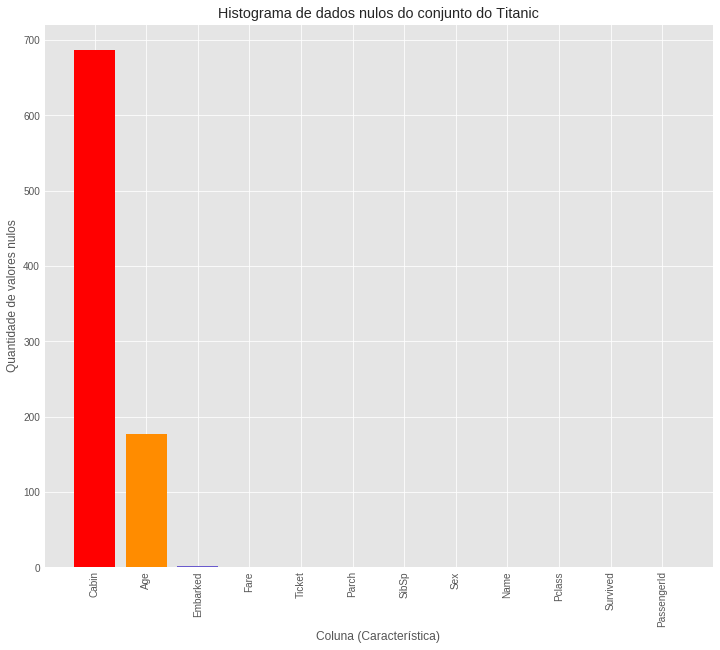

In [0]:
# Vamos ordenar em ordem decrescente para visulizar mais facilmente
df_null_count = df_null_count.sort_values(ascending=False)

# Plotando o histograma
color=['red', 'darkorange', 'slateblue', 'plum', 'gold','seagreen', 'steelblue']
plt.figure(figsize=(12, 10))
plt.style.use('ggplot')
plt.bar(df_null_count.index, df_null_count, color=color)
plt.title('Histograma de dados nulos do conjunto do Titanic')
plt.xticks(rotation=90)
plt.xlabel('Coluna (Característica)')
plt.ylabel('Quantidade de valores nulos')
plt.show()

Outras informações podem ser extraídas utilizando gráficos também. É possível inferir relações entre as variáveis. Por exemplo, qual faixa étaria do sexo masculino teve maior número de sobreviventes? E do sexo feminino? Será que a variável sexo contribui com a variável sobreviveu?

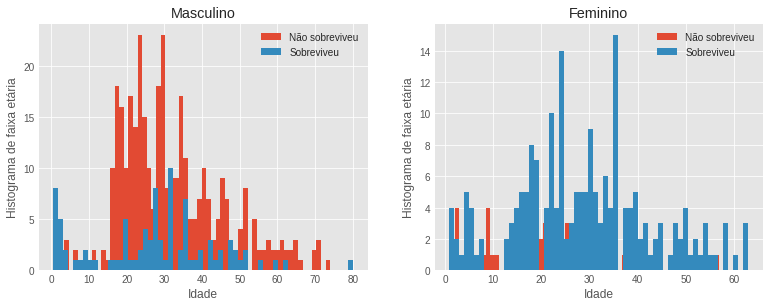

In [0]:
# Plotando a disperção entre idade e condição de sobrevivência
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']

# Sexo masculino
male_survived = male.loc[male['Survived'] == 1, 'Age'].dropna()
male_not_survived = male.loc[male['Survived'] == 0, 'Age'].dropna()

# Sexo feminino
female_survived = female.loc[female['Survived'] == 1, 'Age'].dropna()
female_not_survived = female.loc[female['Survived'] == 0, 'Age'].dropna()

# Plotando os dados
plt.figure(figsize=(13, 10))
plt.style.use('ggplot')
ax = plt.subplot(2, 2, 1)
ax.hist(male_not_survived, bins=60)
ax.hist(male_survived, bins=60)
ax.set_title('Masculino')
ax.set_xlabel('Idade')
ax.set_ylabel('Histograma de faixa etária')
ax.legend(['Não sobreviveu', 'Sobreviveu'])

ax = plt.subplot(2, 2, 2)
ax.hist(female_not_survived, bins=60)
ax.hist(female_survived, bins=60)
ax.set_title('Feminino')
ax.set_xlabel('Idade')
ax.set_ylabel('Histograma de faixa etária')
ax.legend(['Não sobreviveu', 'Sobreviveu'])
plt.show()

**Ex1.** Faça uma nova plotagem do gráfico acima considerando outras faixas etárias:

* Crianças de 0 até 12 anos
* Adolescentes de 13 até 18
* Adultos de 19 até 60
* Idosos mais que 60

Observação: Deve-se separar por sexo de adolescentes em diante (crianças devem ficar no mesmo gráfico).

In [0]:
# Escreva aqui
# Sexo masculino

#criancas
criancas = df[df['Age'] < 13 ]

# Plotando a disperção entre idade e condição de sobrevivência
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']

# Sexo masculino
male_survived = male.loc[male['Survived'] == 1, 'Age'].dropna()
male_not_survived = male.loc[male['Survived'] == 0, 'Age'].dropna()

# Sexo masculino criancas
male_survived = male.loc[male['Survived'] == 1, 'criancas'].dropna()
male_not_survived = male.loc[male['Survived'] == 0, 'criancas'].dropna()

# Sexo feminino
female_survived = female.loc[female['Survived'] == 1, 'Age'].dropna()
female_not_survived = female.loc[female['Survived'] == 0, 'Age'].dropna()

# Plotando os dados
plt.figure(figsize=(13, 10))
plt.style.use('ggplot')
ax = plt.subplot(2, 2, 1)
ax.hist(male_not_survived, bins=60)
ax.hist(male_survived, bins=60)
ax.set_title('Masculino')
ax.set_xlabel('Idade')
ax.set_ylabel('Histograma de faixa etária')
ax.legend(['Não sobreviveu', 'Sobreviveu'])
            
                        

**Ex2.** A primeira ideia que vem a cabeça quando temos dados incompletos é **vamos removê-los**. Podemos remover as colunas (características) ou as linhas (amostras), isso depende da quantidade de valores incompletos. Vamos considerar primeiro o caso de remover colunas. **(Utilize drop)**

In [0]:
# Escreva aqui
colunas = ['Cabin','Age','Embarked']
df_drop =  df_drop.drop colunas
df


# Confirmar que as colunas foram removidas
df_drop.isnull().sum()

Agora vamos considerar o caso de remover linhas.

In [0]:
# Vamos utilizar os índices retornados pelo isnull e combinar com
# o comando any() no eixo 1
rows = df[df.isnull().any(axis=1)].index

df_drop = df.drop(rows)
df_drop.isnull().sum()

O pandas fornece um comando chamado **dropna()** que executa o mesmo que os drops acima, considerando remover dados to tipo NaN. Dessa forma, a remoção é bem simples de se fazer. Por exemplo, para as colunas:

In [0]:
# Removendo as colunas com NaN
df_drop = df.dropna(axis=1)
df_drop.isnull().sum()

E para as linhas basta usar o parâmetro eixo=0:

In [0]:
# Removendo as linhas com NaN
df_drop = df.dropna()
df_drop.isnull().sum()

Antes de continuar, vamos ver porque não é uma boa ideia remover todos os dados com NaN. 

In [0]:
# Quantidade de dados disponíveis
print('Nosso DataFrame tem %d linhas e %d colunas' % df.shape)

# Depois de remover as colunas
print('Removendo todas as colunas NaN nosso DataFrame passa a ter %d linhas e %d colunas' % df.dropna(axis=1).shape)

# Depois de remover as colunas
print('Removendo todas as linhas NaN nosso DataFrame passa a ter %d linhas e %d colunas' % df.dropna().shape)

Aplicando a remoção por coluna, nós  perdemos 3 características, no mundo de Aprendizagem de Máquinas começar subtraindo características é em grande parte das vezes uma péssima ideia. Removendo por linhas foi ainda pior, nós perdemos 708 amostras!!! Nós não podemos desperdiçar dados. Vamos estudar então, maneiras de lidar com esse problema.

### Estimando valores incompletos

A primeira e talvez mais simples ideia que podemos ter, é substituir os dados utilizando alguma médida de estimativa estatística. Uma abordagem bem simples é utilizar a média dos dados. Seja $x$ uma característica (coluna do DataFrame). Considerando a média por exemplo, vamos substituir os valores NaN de $x$ da seguinte forma: 

$$\forall i=1, \dots, m, x_i = \begin{cases} \mu(x), \text{se } x_i = \text{NaN},\\ x_i, \text{caso contrário}. \end{cases}$$

onde $ \mu(x)$ é a média da característica $x$ sem considerar os valores NaN. O único porém de usar essa técnica, é que ela só vai funcionar com dados numéricos.

In [0]:
# Só é possível usar essa estratégia em Age
age_mean = df['Age'].mean()

# Substituíndo
df_clear = df.copy()
df_clear.loc[df['Age'].isnull(), 'Age'] = age_mean
df_clear.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para os valores não numéricos, podemos usar outra medida estatística que também funciona com variáveis categóricas que é a moda. Dessa forma, vamos substituir os valores NaN de $x$ da seguinte forma: 

$$\forall i=1, \dots, m, x_i = \begin{cases} \text{moda}_0(x), \text{se } x_i = \text{NaN},\\ x_i, \text{caso contrário}. \end{cases}$$

onde $ \text{moda}_0(x) $ é a primeira moda da característica $x$ sem considerar os valores NaN.

In [0]:
# A moda retorna mais de um valor se mais de um valor se repete, 
# por isso é necessário escolher um deles
cabin_mode = df['Cabin'].mode().iloc[0]

# Substituindo no nosso DataFrame com a variável Age já "limpa"
df_clear.loc[df_clear['Cabin'].isnull(), 'Cabin'] = cabin_mode
df_clear.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

E finalmente, a variável categórica Embarked:

In [0]:
# Noavmente, a moda retorna mais de um valor se mais de um valor se repete, 
# por isso é necessário escolher um deles
embarked_mode = df['Embarked'].mode().iloc[0]

# Substituindo no nosso DataFrame com as variáveis Age e Cabin já "limpas"
df_clear.loc[df_clear['Embarked'].isnull(), 'Embarked'] = embarked_mode
df_clear.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

O pandas fornece também um metodo **fillna()** que faz o trabalho acima de maneira mais simples. Ele recebe como parâmetro o valor para substituir e opcionalmente um valor booleano **inplace** que se for True vai aplicar a operação no DataFrame (substituindo os valores) e se False, retorna um novo DataFrame. Note que, **inplace=False** é o comportamento padrão da biblioteca.

In [0]:
# Copiando os dados originais
df_clear2 = df.copy()

# Aplicando fillna in_place, cuidado pois isso altera o DataFrame!
df_clear2['Age'].fillna(age_mean, inplace=True)
df_clear2['Cabin'].fillna(cabin_mode, inplace=True)
df_clear2['Embarked'].fillna(embarked_mode, inplace=True)

# Mostrando o DataFrame "limpo"
df_clear2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Ex3.** Escreva uma função que recebe como argumento um DataFrame pandas, uma string com a opção do estimador estatístico para substituir os valores nulos e um parâmetro inplace que indica se a operação será realizada no DataFrame ou não.

In [0]:
# Escreva aqui


### Lidando com variáveis categóricas

Depois de limpar os dados, isto é, remover dados nulos, precisamos lidar com outro fato: Variáveis categóricas. A maior parte das técncias de Aprendizagem de Máquinas não foram desenvolvidas para trabalhar com dados categóricos, ou seja, elas aceitam apenas dados numéricos. Como sabemos que não é uma boa ideia desperdiçar dados, temos que de alguma forma transformar os dados categóricos em numéricos. Nossa entrada aqui será o DataFrame "limpo" dos dados nulos **df_clear2**.

### Label enconder

Label enconder é uma técnica para transformar dados categóricos em numéricos. A ideia é simples e efetiva, mas deve ser utilizada com cuidado, pois, ela é uma boa ideia para ser aplicada apenas em rótulos (variáveis em que a distância numérica não importa). Para fazer label enconder no pandas, podemos utilizar o método **map()** que recebe um mapeamento para ser utilizado sobre os rótulos. O mapeamento precisa ser criado por meio de um dicionário do Python que vai mapear os rótulos em números.

In [0]:
# Função de label encoder
def label_encoder(df, column):
    map_class = {}
    for idx, label in enumerate(df[column].unique()):
        map_class[label] = idx
    return map_class

# Copiar Data Frame para manter os dados intactos
df_clear3 = df_clear2.copy()

# Fazendo label encoder
map_class = label_encoder(df_clear3, 'Cabin')

# Aplicando label encoder no nosso dataframe
df_clear3['Cabin'] = df_clear3['Cabin'].map(map_class)
df_clear3['Cabin']

0        0
1        1
2        0
3        2
4        0
      ... 
886      0
887    145
888      0
889    146
890      0
Name: Cabin, Length: 891, dtype: int64

Normalmente depois de executar alguma técnica de Aprendizagem de Máquinas nós queremos obter os valores em formato de String novamete em vez dos números, então, podemos definir uma função **label_decoder**.

In [0]:
# Função de label decoder
def label_decoder(map_class):
    inv_map_class = {}
    for label, idx in map_class.items():
        inv_map_class[idx] = label
    return inv_map_class

# Fazendo o mapeamento contrário
inv_map_class = label_decoder(map_class)
df_clear3['Cabin'] = df_clear3['Cabin'].map(inv_map_class)
df_clear3['Cabin']

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

Variáveis que a distância numérica não interferem são ótimas candidatas para o Label Enconder, por exemplo no conjunto do titanic podemos usar Label Enconder na coluna (característica) Sex, pois, existem apenas duas variações. Contudo, na coluna Cabin não é uma boa ideia usar Label Encoder, pois, como as técnicas de Aprendizagem de Máquinas são baseadas em distâncias, estariamos dizendo que uma amostra está mais próxima da outra, o que certamente vai fazer o modelo considerar essas amostras mais próximas.

### One-hot encoding

Uma opção ao Label Encoder é o *one-hot enconding* que não faz com que o modelo considere as amostras próximas uma das outras. A ideia do one-hot enconding é simples: para cada variação de uma categoria crie uma nova variável (coluna) binária. Esse variáveis são também chamadas de *dummies*. O pandas tem um método **pd.get_dummies()** que recebe um DataFrame e as colunas para serem transformadas via one-hot enconding.

In [0]:
# Executando one-hot-enconding em uma coluna
colunas = ['Cabin']
pd.get_dummies(df_clear3, columns=colunas)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,...,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Um dos problemas do *one-hot enconding* é que ele pode fazer as colunas (características) crescerem muito e além disso pode introduzir alguns problemas estatísticos. Contudo, one hot-enconding é uma das técnicas mais utilizadas para conversão de variáveis categóricas. Adicionalmente, o pandas possui um parâmetro **drop_first** que remove a primeira coluna do one-hot enconding. Note que, isso não modifica em nada o resultado do one-hot enconding, apenas diminui o número de variáveis novas por 1.

In [0]:
# Executando one-hot-enconding em uma coluna e revomendo a primeira variável
colunas = ['Cabin']
df_clear4 = pd.get_dummies(df_clear3, columns=colunas, drop_first=True)
df_clear4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,...,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Transforme as variáveis Sex e Embarked usando one-hot enconding.

In [0]:
# Escreva aqui
colunas = ['Sex', 'Embarked']
df_clear4 = pd.get_dummies(df_clear4, columns=colunas, drop_first=True)
df_clear4

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Para algumas variáveis não faz sentido aplicar *one-hot enconding*, por exemplo a coluna Ticket tem 681 variações, o que vai introduzir 681 variáveis novas. As variáveis Name e PassengerId não vão ter muita contribuição pois são identificadores com pouco variação, assim como Ticket. Portanto vamos removê-las.

In [0]:
# Removendo algumas variáveis 
colunas = ['Ticket', 'PassengerId', 'Name']
df_clear_end = df_clear4.drop(colunas, axis=1)
df_clear_end.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
